In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
#Import given dataset
train = pd.read_csv('Train.csv')
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# Checking statistical information of the data

In [7]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Checking Feature datatypes

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Checking the number of Unique values in the Features

In [9]:
train.apply(lambda x: len(x.unique()))

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

Preprocessing of the Data

In [11]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Categorical Attributes

In [12]:
cat_col = []
for x in train.dtypes.index:
    if train.dtypes[x]=='object':
        cat_col.append(x)
cat_col

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [13]:
cat = [ x for x in train.dtypes.index if train.dtypes[x]=='object']

In [14]:
cat.remove('Item_Identifier')
cat.remove('Outlet_Identifier')

In [15]:
cat

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

printing Categorical values in the Categorical Features

In [16]:
for col in cat:
    print(col)
    print(train[col].value_counts(), '\n')

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64 

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64 

Outlet_Size
Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64 

Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64 

Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: 

Identifying and Filling the Null Values

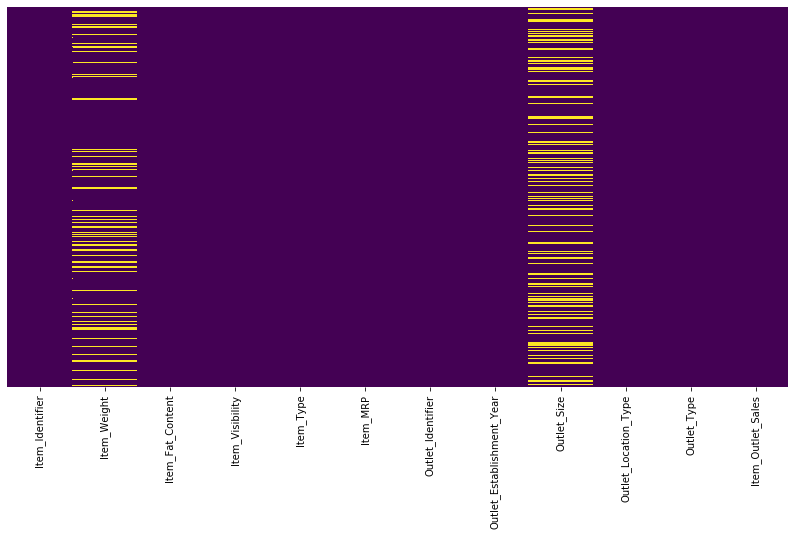

In [17]:
plt.figure(figsize=(14,7))
sns.heatmap(train.isnull(), yticklabels =False, cbar = False, cmap = 'viridis' )

In [18]:
train.Item_Weight.isnull().value_counts()

False    7060
True     1463
Name: Item_Weight, dtype: int64

In [19]:
train.Item_Weight.mode()

0    12.15
dtype: float64

In [20]:
train.Item_Weight.mean()

12.857645184135976

In [21]:
train['Item_Weight'].fillna(12.852244335122377, inplace = True)

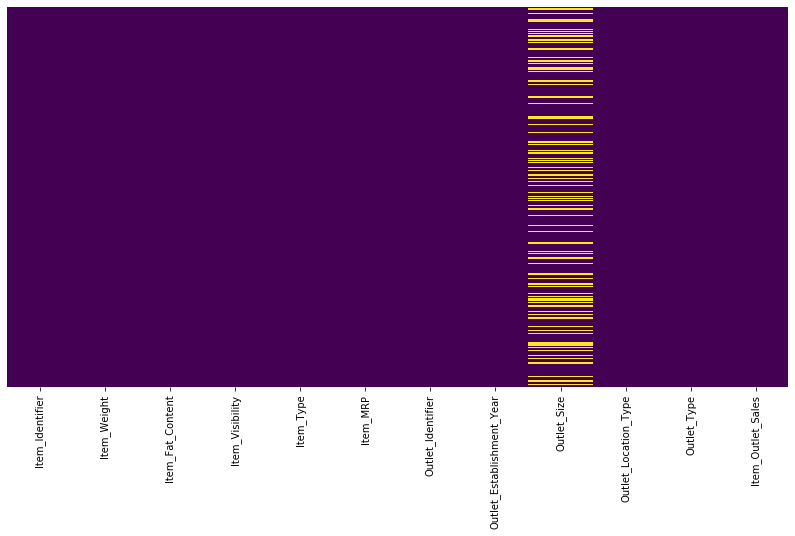

In [22]:
plt.figure(figsize=(14,7))
sns.heatmap(train.isnull(), yticklabels =False, cbar = False, cmap = 'viridis' )

In [24]:
train.Outlet_Size.unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [25]:
train.Outlet_Size.mode()

0    Medium
dtype: object

In [26]:
train['Outlet_Size'] = train.Outlet_Size.fillna('Medium')

In [27]:
train.Outlet_Size.unique()

array(['Medium', 'High', 'Small'], dtype=object)

In [28]:
train.Outlet_Size.value_counts()

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [29]:
train['Outlet_Size'].nunique()

3

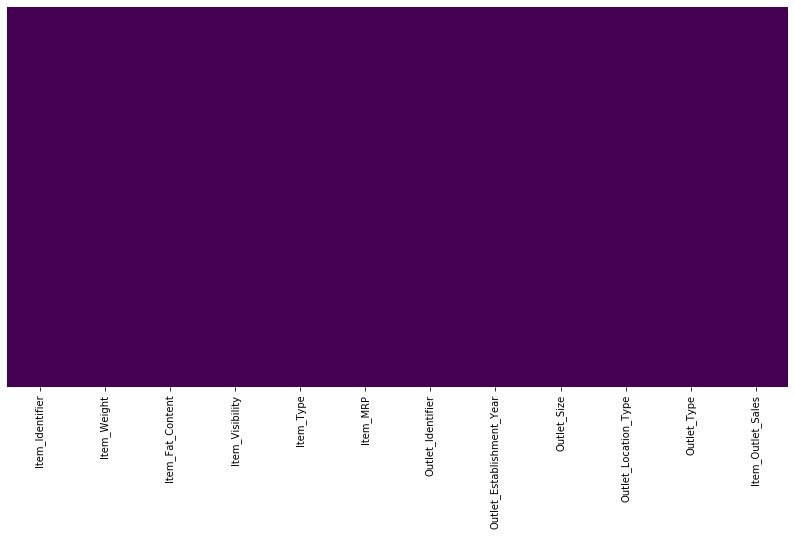

In [30]:
plt.figure(figsize=(14,7))
sns.heatmap(train.isnull(), yticklabels =False, cbar = False, cmap = 'viridis' )

In [31]:
sum(train['Item_Visibility']==0)

526

In [32]:
train.Item_Visibility.mean()

0.06613202877895107

# Replacing 0 values in the Item_Visibility with the Mean Item_Visibility

In [33]:
train.loc[:, 'Item_Visibility'].replace([0], [train['Item_Visibility'].mean()], inplace  = True)

In [34]:
sum(train['Item_Visibility']==0)

0

# Re-Categoring the Item_Fat_content

In [35]:
train['Item_Fat_Content'] = train['Item_Fat_Content'].replace({'LF': 'Low Fat','reg':'Regular', 'low fat': 'Low Fat'})


In [36]:
train.Item_Fat_Content.value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

CREATING NEW ATTRIBUTES

In [37]:
train['New_Item_Type'] = train['Item_Identifier'].apply(lambda x: x[:2])
train['New_Item_Type']

0       FD
1       DR
2       FD
3       FD
4       NC
        ..
8518    FD
8519    FD
8520    NC
8521    FD
8522    DR
Name: New_Item_Type, Length: 8523, dtype: object

In [38]:
train['New_Item_Type'] = train['New_Item_Type'].map({'FD':'Food', 'NC': 'Non-Consumable','DR': 'Drinks'})
train['New_Item_Type'].value_counts()

Food              6125
Non-Consumable    1599
Drinks             799
Name: New_Item_Type, dtype: int64

Creating new Feature from the establishment year

In [39]:
train['Outlet_Years'] = 2013 - train['Outlet_Establishment_Year']
train['Outlet_Years']

0       14
1        4
2       14
3       15
4       26
        ..
8518    26
8519    11
8520     9
8521     4
8522    16
Name: Outlet_Years, Length: 8523, dtype: int64

EXPLORATORY DATA ANALYSIS

In [40]:
train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Outlet_Years
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food,14
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drinks,4
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food,14
3,FDX07,19.200,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,Food,15
4,NCD19,8.930,Low Fat,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non-Consumable,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,Food,26
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850,Food,11
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,Non-Consumable,9
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,Food,4


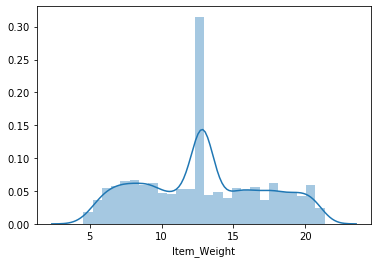

In [41]:
sns.distplot(train['Item_Weight'])

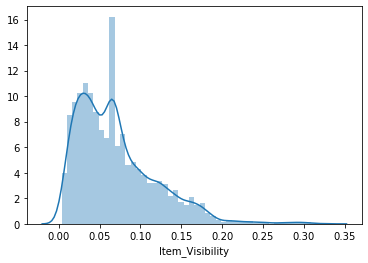

In [42]:
sns.distplot(train['Item_Visibility'])

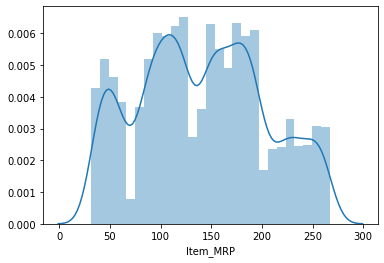

In [43]:
sns.distplot(train['Item_MRP'])

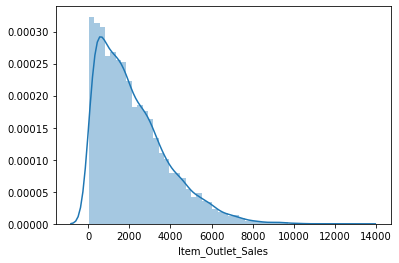

In [44]:
sns.distplot(train['Item_Outlet_Sales'])

In [45]:
train['Item_Outlet_Sales'] = np.log(1 + train['Item_Outlet_Sales'])

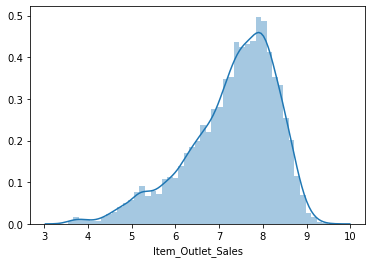

In [46]:
sns.distplot(train['Item_Outlet_Sales'])

Combine test and train into one file

To append test data to the train data. So, we will combine both train and test to carry out data visualization, feature engineering, one-hot encoding, and label encoding. Later we would split this combined data back to train and test datasets.

In [90]:
train['source']='train'
test['source']='test'
data = pd.concat([train, test],ignore_index=True)
print(train.shape, test.shape, data.shape)

(8523, 26) (5681, 12) (14204, 30)


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


In [91]:

data.dtypes

Item_Fat_Content              object
Item_Fat_Content_0           float64
Item_Fat_Content_1           float64
Item_Identifier               object
Item_MRP                     float64
Item_Outlet_Sales            float64
Item_Type                     object
Item_Visibility              float64
Item_Weight                  float64
New_Item_Type_0              float64
New_Item_Type_1              float64
New_Item_Type_2              float64
Outlet                       float64
Outlet_Establishment_Year      int64
Outlet_Identifier             object
Outlet_Location_Type          object
Outlet_Location_Type_0       float64
Outlet_Location_Type_1       float64
Outlet_Location_Type_2       float64
Outlet_Size                   object
Outlet_Size_0                float64
Outlet_Size_1                float64
Outlet_Size_2                float64
Outlet_Type                   object
Outlet_Type_0                float64
Outlet_Type_1                float64
Outlet_Type_2                float64
O

,Item_Fat_Content_0,Item_Fat_Content_1,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,New_Item_Type_0,New_Item_Type_1,New_Item_Type_2,Outlet,...,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,Outlet_Years
count,8523.000000,8523.000000,14204.000000,8523.000000,14204.000000,13228.000000,8523.000000,8523.000000,8523.000000,8523.000000,...,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,0.647307,0.352693,141.004977,7.297863,0.068402,12.799423,0.093746,0.718644,0.187610,4.722281,...,0.326763,0.393054,0.109351,0.610466,0.280183,0.127068,0.654347,0.108882,0.109703,15.168133
std,0.477836,0.477836,62.086938,1.015211,0.049809,4.387704,0.291493,0.449687,0.390423,2.837201,...,0.469057,0.488457,0.312098,0.487673,0.449115,0.333069,0.475609,0.311509,0.312538,8.371760
min,0.000000,0.000000,31.290000,3.534854,0.000000,4.555000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
25%,0.000000,0.000000,94.012000,6.727728,0.030597,9.035000,0.000000,0.000000,0.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000
50%,1.000000,0.000000,142.247000,7.492945,0.058461,12.852244,0.000000,1.000000,0.000000,5.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,14.000000
75%,1.000000,1.000000,185.855600,8.039898,0.094037,16.250000,0.000000,1.000000,0.000000,7.000000,...,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,26.000000
max,1.000000,1.000000,266.888400,9.479448,0.328391,21.350000,1.000000,1.000000,1.000000,9.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,28.000000


# Categorical Attributes

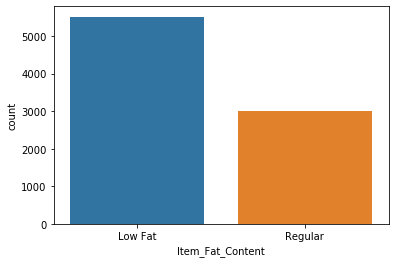

In [47]:
sns.countplot(train['Item_Fat_Content'])

[Text(0, 0, 'Dairy'),
 Text(0, 0, 'Soft Drinks'),
 Text(0, 0, 'Meat'),
 Text(0, 0, 'Fruits and Vegetables'),
 Text(0, 0, 'Household'),
 Text(0, 0, 'Baking Goods'),
 Text(0, 0, 'Snack Foods'),
 Text(0, 0, 'Frozen Foods'),
 Text(0, 0, 'Breakfast'),
 Text(0, 0, 'Health and Hygiene'),
 Text(0, 0, 'Hard Drinks'),
 Text(0, 0, 'Canned'),
 Text(0, 0, 'Breads'),
 Text(0, 0, 'Starchy Foods'),
 Text(0, 0, 'Others'),
 Text(0, 0, 'Seafood')]

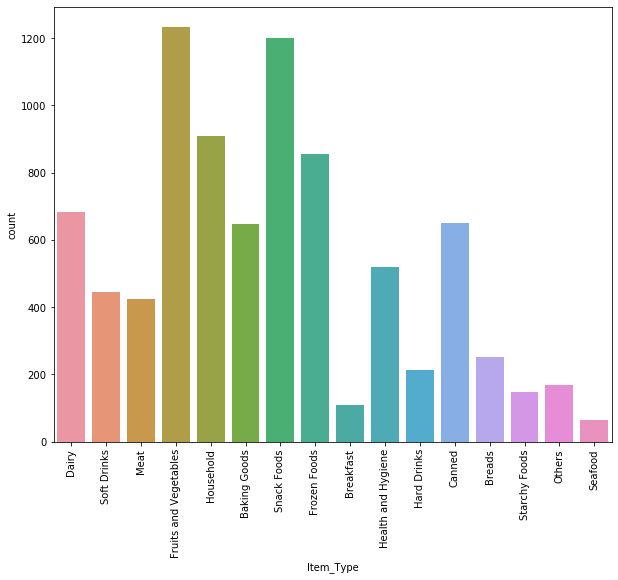

In [48]:
plt.figure(figsize=(10,8))
l = list(train['Item_Type'].unique())
chart = sns.countplot(train['Item_Type'])
chart.set_xticklabels(labels = l, rotation= 90)

[Text(0, 0, '1999'),
 Text(0, 0, '2009'),
 Text(0, 0, '1998'),
 Text(0, 0, '1987'),
 Text(0, 0, '1985'),
 Text(0, 0, '2002'),
 Text(0, 0, '2007'),
 Text(0, 0, '1997'),
 Text(0, 0, '2004')]

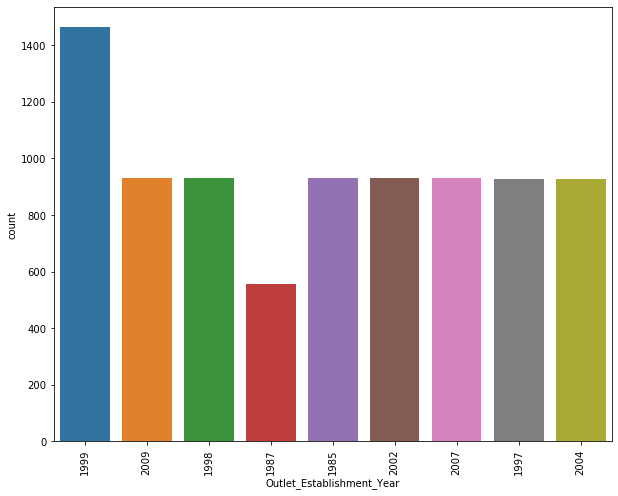

In [49]:
plt.figure(figsize=(10,8))
l = list(train['Outlet_Establishment_Year'].unique())
chart = sns.countplot(train['Outlet_Establishment_Year'])
chart.set_xticklabels(labels = l, rotation= 90)

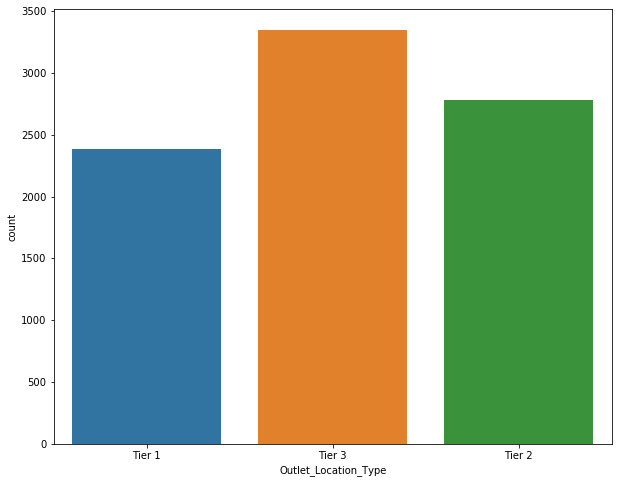

In [50]:
plt.figure(figsize=(10,8))
sns.countplot(train['Outlet_Location_Type'])

# Correlation Matrix

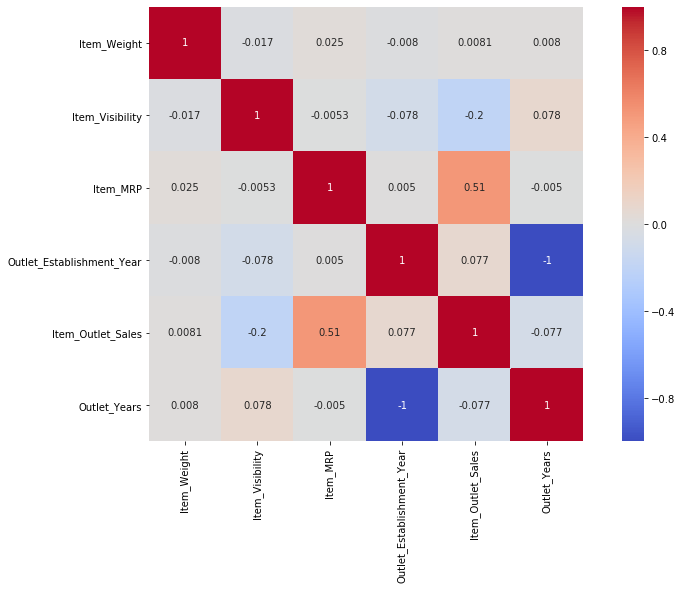

In [52]:
corr = train.corr()
plt.figure(figsize = (14, 8))
sns.heatmap(corr, annot = True, cmap = 'coolwarm', square = True)

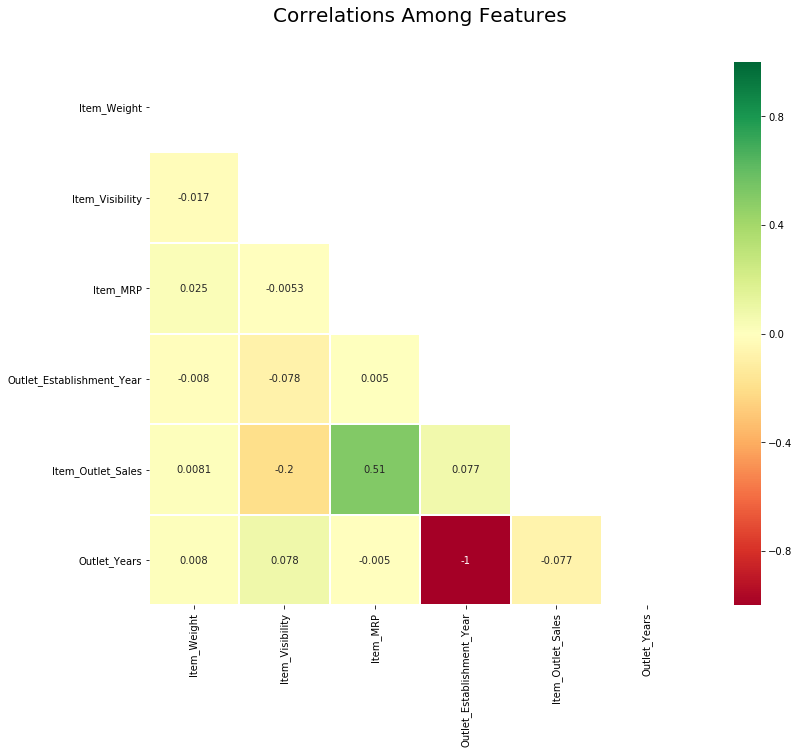

In [53]:
mask = np.zeros_like(corr, dtype=np.bool)

mask[np.triu_indices_from(mask)] = True
#sns.set_style('whitegrid')


plt.subplots(figsize = (15,10))
sns.heatmap(corr, 
            annot=True,
            mask = mask,
            cmap = 'RdYlGn',
            linewidths=.9, 
            linecolor='white',
            fmt='.2g',
            center = 0,
            square=True)
plt.title("Correlations Among Features", y = 1.03,fontsize = 20, pad = 40);

# label encoding

In [54]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 14 columns):
Item_Identifier              8523 non-null object
Item_Weight                  8523 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  8523 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
New_Item_Type                8523 non-null object
Outlet_Years                 8523 non-null int64
dtypes: float64(4), int64(2), object(8)
memory usage: 932.3+ KB


In [55]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train['Outlet'] = le.fit_transform(train['Outlet_Identifier'])
cat_col = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type','New_Item_Type']
for col in cat_col:
    train[col] = le.fit_transform(train[col])

One hot Encoding

One-Hot-Coding refers to creating dummy variables, one for each category of a categorical variable. For example, the Item_Fat_Content has 3 categories — LowFat,Regular,Non-Edible. One hot coding will remove this variable and generate 3 new variables. Each will have binary numbers — 0 (if the category is not present) and 1(if category is present).

In [ ]:
train = pd.get_dummies(train, columns = ['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type','New_Item_Type'])
train.head()

Detecting Outliers

In [57]:
# Outlier detection
def outlierDetector(df, feature):
    plt.figure(figsize = (10,5))
    sns.boxplot(x = df[feature])

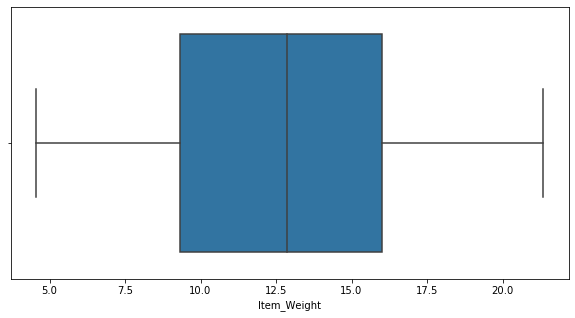

In [58]:
outlierDetector(train, 'Item_Weight')

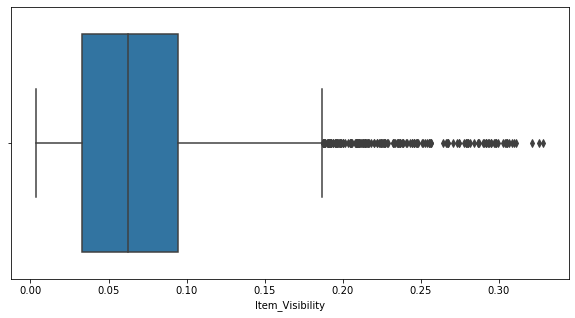

In [59]:
outlierDetector(train, 'Item_Visibility')

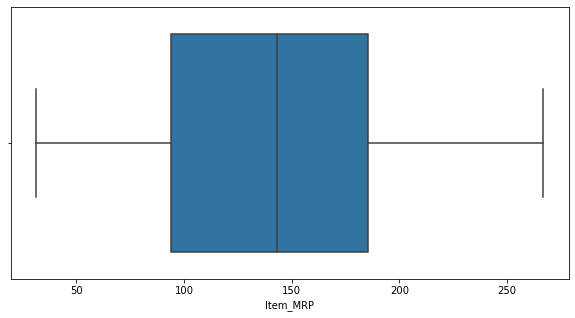

In [60]:
outlierDetector(train, 'Item_MRP')

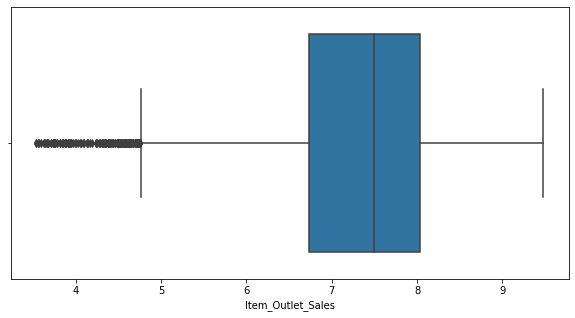

In [61]:
outlierDetector(train, 'Item_Outlet_Sales')

Removing outliers

In [62]:
def outlierTreater(df,feature,quant):
    min_threshold, max_threshold = df[feature].quantile([quant[0],quant[1]])
    print('1. Minimum Threshold: ', min_threshold, '\n2. Maximum Threshold: ', max_threshold)
    
    return df[(df[feature]<max_threshold) & (df[feature]>min_threshold)]

In [63]:
train_no_outlier = outlierTreater(train, 'Item_Visibility', [0.05,0.95])

1. Minimum Threshold:  0.013486102900000001 
2. Maximum Threshold:  0.1637797635999999


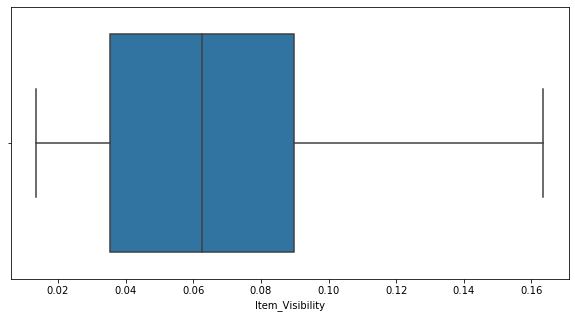

In [64]:
outlierDetector(train_no_outlier, 'Item_Visibility')

In [65]:
train_no_outlier = outlierTreater(train, 'Item_Outlet_Sales', [0.1, 0.9])

1. Minimum Threshold:  5.842247344312063 
2. Maximum Threshold:  8.427498479319112


Data split and Exporting Data

In [93]:
# Drop the columns which have been converted to different types:
data= train_no_outlier.drop(columns = ['Outlet_Establishment_Year', 'Item_Identifier', 'Outlet_Identifier', 'Item_Outlet_Sales'])
y = train_no_outlier['Item_Outlet_Sales']

Model Building

In [69]:
X_train = train.drop(['Item_Outlet_Sales', 'Outlet_Identifier','Item_Identifier'], axis=1)
Y_train = train.Item_Outlet_Sales

X_train, Y_train

(      Item_Weight  Item_Visibility  Item_Type  Item_MRP  \
 0           9.300         0.016047          4  249.8092   
 1           5.920         0.019278         14   48.2692   
 2          17.500         0.016760         10  141.6180   
 3          19.200         0.066132          6  182.0950   
 4           8.930         0.066132          9   53.8614   
 ...           ...              ...        ...       ...   
 8518        6.865         0.056783         13  214.5218   
 8519        8.380         0.046982          0  108.1570   
 8520       10.600         0.035186          8   85.1224   
 8521        7.210         0.145221         13  103.1332   
 8522       14.800         0.044878         14   75.4670   
 
       Outlet_Establishment_Year  Outlet_Years  Outlet  Item_Fat_Content_0  \
 0                          1999            14       9                   1   
 1                          2009             4       3                   0   
 2                          1999            

In [79]:
X_test = pd.read_csv('Test.csv')

In [80]:
X_test.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


Linear Regression Model:

In [78]:
# Measuring Accuracy
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error,mean_absolute_error
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn import metrics

In [81]:
# Fitting Multiple Linear Regression to the training set

from sklearn.linear_model import LinearRegression

r = LinearRegression()
r.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [101]:
X_test = test.drop(['Outlet_Identifier','Item_Identifier'], axis=1)

X_test

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,source
0,20.750,Low Fat,0.007565,Snack Foods,107.8622,1999,Medium,Tier 1,Supermarket Type1,test
1,8.300,reg,0.038428,Dairy,87.3198,2007,NaN,Tier 2,Supermarket Type1,test
2,14.600,Low Fat,0.099575,Others,241.7538,1998,NaN,Tier 3,Grocery Store,test
3,7.315,Low Fat,0.015388,Snack Foods,155.0340,2007,NaN,Tier 2,Supermarket Type1,test
4,NaN,Regular,0.118599,Dairy,234.2300,1985,Medium,Tier 3,Supermarket Type3,test
...,...,...,...,...,...,...,...,...,...,...
5676,10.500,Regular,0.013496,Snack Foods,141.3154,1997,Small,Tier 1,Supermarket Type1,test
5677,7.600,Regular,0.142991,Starchy Foods,169.1448,2009,Medium,Tier 3,Supermarket Type2,test
5678,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,2002,NaN,Tier 2,Supermarket Type1,test
5679,15.300,Regular,0.000000,Canned,214.6218,2007,NaN,Tier 2,Supermarket Type1,test


In [106]:
  import math

In [117]:
def train(model, X, y):
    
    # training the model
    model.fit(X,y)
    
    # predict the train set
    predictions = model.predict(X)
     # cross validation 
    cv_score = cross_val_score(model, X, y, scoring = 'neg_mean_squared_error')
    cv_score = np.sqrt(np.abs(cv_score))
     #Print model report:
    print('Model Report')
    print('Mean Squared Error: ', mean_squared_error(y,predictions))
    print "CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score))
    print('Cross validation Score: ', cv_score)
    print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(y,predictions)))
 

    #Predict on testing data:
    y = moddel.predict(X)

SyntaxError: invalid syntax (<ipython-input-117-852314184753>, line 14)

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Model Report
Mean Squared Error:  0.21474279448544853
Cross validation Score:  0.2158187955207266


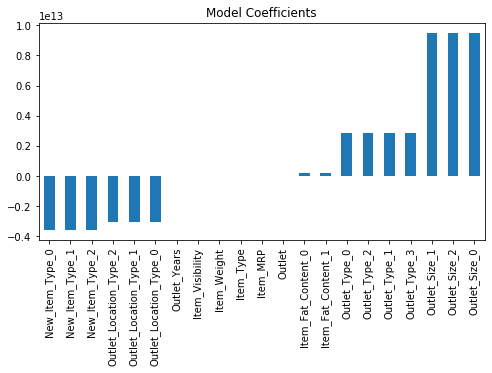

In [99]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
model = LinearRegression(normalize=True)
train(model, X, y)
coeff = pd.Series(model.coef_, X.columns).sort_values()
coeff.plot(kind = 'bar', title = 'Model Coefficients', figsize =(8, 4))

Ridge

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Model Report
Mean Squared Error:  0.27714224580009306
Cross validation Score:  0.2780124057784636


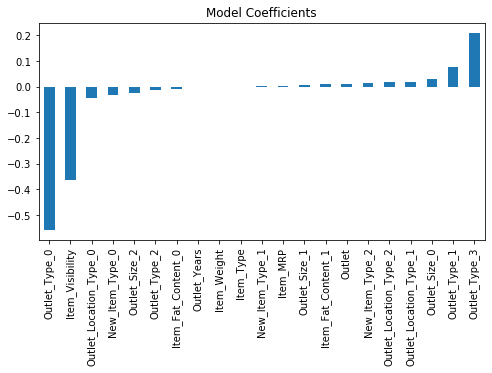

In [120]:
model = Ridge(normalize=True)
train(model, X, y)
coeff = pd.Series(model.coef_, X.columns).sort_values()
coeff.plot(kind = 'bar', title = 'Model Coefficients', figsize =(8, 4))

Lasso

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Model Report
Mean Squared Error:  0.34504417367421797
Cross validation Score:  0.34508516674339074


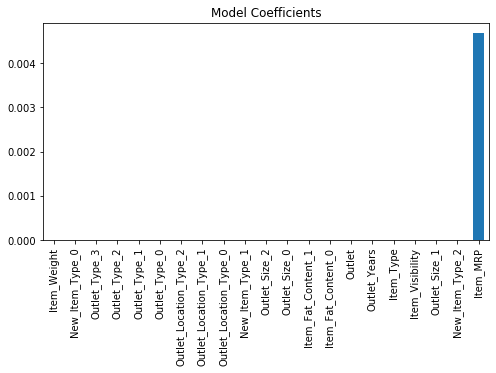

In [121]:
model = Lasso()
train(model, X, y)
coeff = pd.Series(model.coef_, X.columns).sort_values()
coeff.plot(kind = 'bar', title = 'Model Coefficients', figsize =(8, 4))

Model Report
Mean Squared Error:  4.404847614275586e-11
Cross validation Score:  0.4162809125203302


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


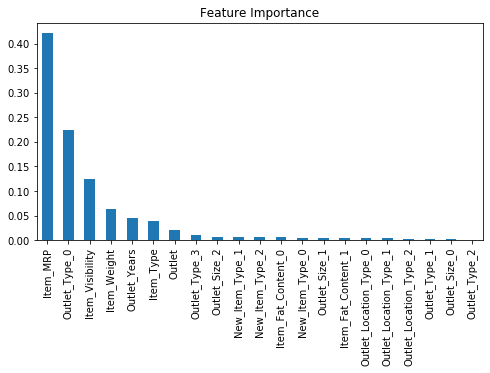

In [123]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
train(model, X, y)
coeff = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
coeff.plot(kind = 'bar', title = 'Feature Importance', figsize =(8, 4))


Random Forest

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Model Report
Mean Squared Error:  0.04171175131464775
Cross validation Score:  0.23457705797264827


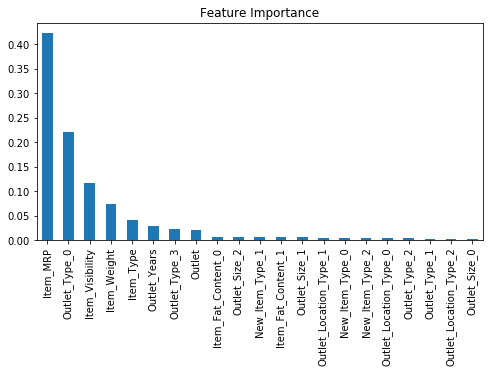

In [124]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
train(model, X, y)
coeff = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
coeff.plot(kind = 'bar', title = 'Feature Importance', figsize =(8, 4))

Extra Tree

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Model Report
Mean Squared Error:  3.058657974771282e-12
Cross validation Score:  0.24100664735312358


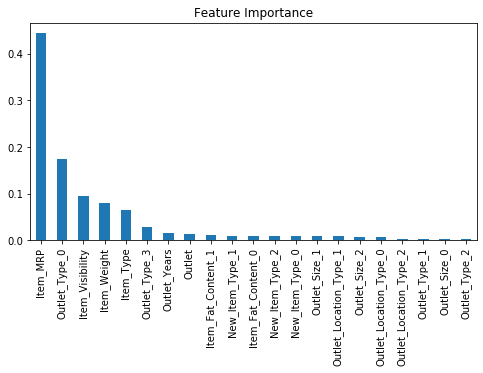

In [125]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
train(model, X, y)
coeff = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
coeff.plot(kind = 'bar', title = 'Feature Importance', figsize =(8, 4))

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Model Report
Mean Squared Error:  0.21628117576938266
Cross validation Score:  0.21987327208785765


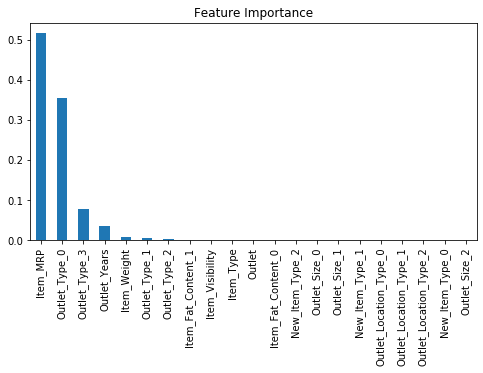

In [126]:
from sklearn.ensemble import AdaBoostRegressor
model = AdaBoostRegressor()
train(model, X, y)
coeff = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
coeff.plot(kind = 'bar', title = 'Feature Importance', figsize =(8, 4))

Creating a data frame of Model Predictions

In [127]:
model_used = ['Linear Regression', 'Lasso', 'Ridge', 'Decision Tree Regressor', 'Random Forest', 
              'EXtra Tree Regressor', 'AdaBoostRegressor']
mse = [0.215, 0.342, 0.277, 7.310, 0.030, 1.023, 0.216]
cvs = [0.216, 0.343, 0.277, 0.407, 0.216, 0.228, 0.224]

In [128]:
d = {'Model': model_used, 'MSE': mse, 'Cross Validation Score': cvs}
pd.DataFrame(data = d)

,Model,MSE,Cross Validation Score
0,Linear Regression,0.215,0.216
1,Lasso,0.342,0.343
2,Ridge,0.277,0.277
3,Decision Tree Regressor,7.310,0.407
4,Random Forest,0.030,0.216
5,EXtra Tree Regressor,1.023,0.228
6,AdaBoostRegressor,0.216,0.224
